# Traffic Accidents Data Analysis

In this project we will analyze the the dataset of Traffic Accidents occurred in UK

### Objectives of the Project are to find:

* Where do most car accidents occur
* When do most car accidents occur
    - Have car accidents distributions varied in any way over the years?
* Road conditions in accidents
    - Road type
    - Weather conditions
    - Light conditions
    - Speed limit
* Cause of Fatal Accidents

## Processing Data
### *Getting Data ready for exploration*

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # Setting style for graphs
%matplotlib inline

import datetime as dt

import warnings
warnings.filterwarnings('ignore')

### Loading Datasets and merging them together

In [2]:
df_2005_2007 = pd.read_csv("accidents_2005_to_2007.csv")
df_2009_2011 = pd.read_csv("accidents_2009_to_2011.csv")
df_2012_2014 = pd.read_csv("accidents_2012_to_2014.csv")

# 2008 data is missing in this dataset
# now merging all the three dataframe in one dataframe
accidents = pd.concat([df_2005_2007, df_2009_2011,df_2012_2014], axis=0)

Columns of the dataframe are:

In [3]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

### Data cleaning and feature engineering

Creating a new column with data as month of the accident

In [4]:
accidents["Month"] = pd.DatetimeIndex(accidents["Date"]).month

Creating a new column with data as hour on which accident happens

In [5]:
# selRows = accidents[accidents['Time'].isna()].index
# accidents = accidents.drop(selRows, axis=0)
accidents["Time"] = pd.to_datetime(accidents["Time"], format='%H:%M')
accidents["Hour"] = accidents["Time"].dt.hour

Checking the values of column "Number_of_casualities"

In [6]:
accidents["Number_of_Casualties"].unique() 

array([ 1,  2,  5,  4,  3,  8,  7,  6, 10,  9, 23, 17, 13, 11, 19, 15, 16,
       12, 14, 18, 20, 29, 21, 35, 22, 26, 45, 41, 36, 40, 25, 28, 42, 68,
       27, 48, 24, 43, 87, 63, 51, 33, 38, 46, 70, 93, 54], dtype=int64)

Ideally it should contain only three values, 1: Fatal, 2: Severe, 3: Not Severe

But it contains different values so will not be able to analyse it

,Features,MissingPercent
5,Junction_Detail,100.000000
6,Junction_Control,40.078117
14,LSOA_of_Accident_Location,7.195958
13,Did_Police_Officer_Attend_Scene_of_Accident,0.194263
10,Road_Surface_Conditions,0.130173
9,Weather_Conditions,0.008377
4,Time,0.007778
15,Hour,0.007778
0,Location_Easting_OSGR,0.006715
1,Location_Northing_OSGR,0.006715


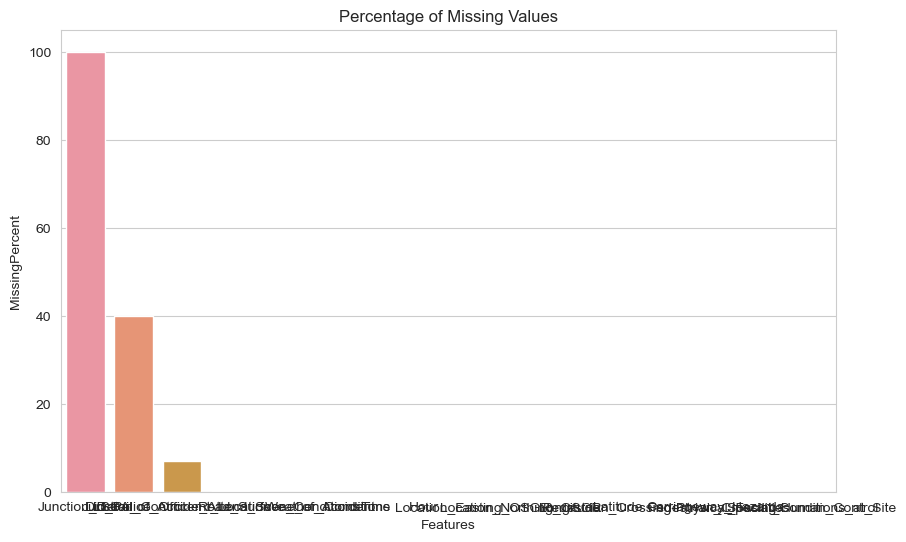

In [7]:
# Function showing missing values in each column
def get_missings(df):
    labels,values = list(),list()
    if df.isna().sum().sum()>0:
        for column in df.columns:
            if df[column].isnull().sum():
                labels.append(column)
                values.append((df[column].isnull().sum() / len(df[column]))*100)

                #Make a dataframe 
        missings=pd.DataFrame({'Features':labels,'MissingPercent':values }).sort_values(by='MissingPercent',ascending=False)
        plt.figure(figsize=(10,6))
        sns.barplot(x=missings.Features,y=missings.MissingPercent).set_title('Percentage of Missing Values')
        return missings
    else:
        return False

get_missings(accidents)

The columns with a big amount of missing data won't be used in our analysis. Other features have a very *little amount* of missing data (<1%), so we will just keep it that way.

In [8]:
accidents_peryear = {}

years = ['2005', '2006', "2007", "2009", "2010", "2011", "2012", "2013", "2014"]
for year in years:
    accidents_peryear[year] = accidents[accidents["Year"]==int(year)]

accidents_perdow = {}

dow = {1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday", 7:"Sunday"}
for key in dow:
    accidents_perdow[dow[key]] = accidents[accidents["Day_of_Week"]==key]
    
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Ag", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}

In [9]:
# for whatever reason, year 2007 doens't seem to be sorted by date
print("Before:", accidents_peryear["2007"]["Month"].unique())

accidents_peryear["2007"] = accidents_peryear["2007"].sort_values("Month")
print("After:", accidents_peryear["2007"]["Month"].unique())

Before: [ 5  2  8  3  9 10 12  1 11  6  7  4]
After: [ 1  2  3  4  5  6  7  8  9 10 11 12]


<a id="analyze"></a> <a id="share"></a> <a id="where"></a>
## 4. Analyze & 5. Share
### *Getting insights and sharing them with the world*
We will be doing both steps at once, because as we all know most of the times the best way to analyze and gain insights from data is through visualization.

Here we will try to answer the questions from the *Ask* phase while trying to present the info as clearly as possible.

## Where do most accidents occur?
### Accidents Density Graph

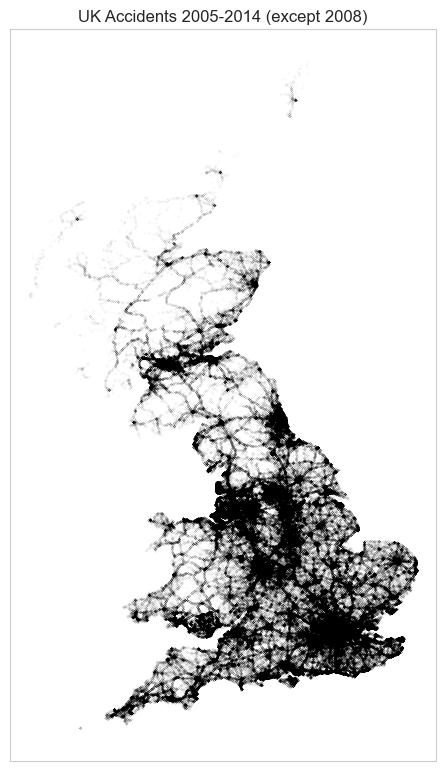

In [10]:
plt.figure(figsize=(5.5,9.5))
plt.axes().set_facecolor("white")
plt.scatter(x = accidents["Longitude"], y = accidents["Latitude"],s=0.005, alpha= 0.25, color="black")
plt.title("UK Accidents 2005-2014 (except 2008)")
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

Looks like most accidents happen, as could be expected; in big cities around **London**, **Liverpool** and the **Midlands**, and around *Newcastle* and *Middlesbrough* in the **North East**. Meanwhile in *Scotland* there's a big concentration as well, between **Glasgow** and **Edinburgh**. In *Wales*, most accidents occur near the capital, **Cardiff**. 

Comparing countries in the UK (or Great Britain, I don't think there's data from Nothern Ireland), most accidents seem to take place in **England**. We should also keep in mind there is where most trips happen. It's probably not that English drivers don't how to drive. It's more likely that there is a higher chance to suffer an accident when there's more traffic. This same logic can be applied throughout the whole analysis.

<a id="when"></a>
## When do most car accidents occur?
### Accidents over the years

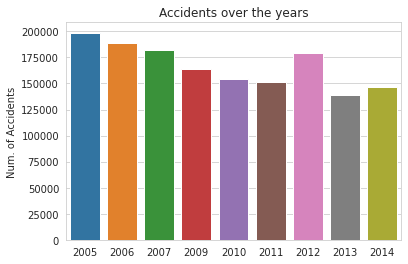

Mean:167093.22   Standard Deviation:21002.18


In [11]:
sns.barplot(x=accidents.Year.value_counts().index,y=accidents.Year.value_counts())
plt.ylabel("Num. of Accidents")
plt.title("Accidents over the years")

plt.show()

print("Mean:{:.2f}   Standard Deviation:{:.2f}".format(accidents.Year.value_counts().mean(), 
                                                      accidents.Year.value_counts().std()))

We can see the amount of traffic accidents has diminished over the years, displaying a **downwards trend with a rare increase in year 2012**. We would need more information to know exactly what caused this. Maybe the *London 2012 Olympics* and *Paralympics* had something to do with it.

During this years, they **averaged** *167,127.78* accidents, with a **Standard Deviation** of *21,006.79*.

### Accidents each month

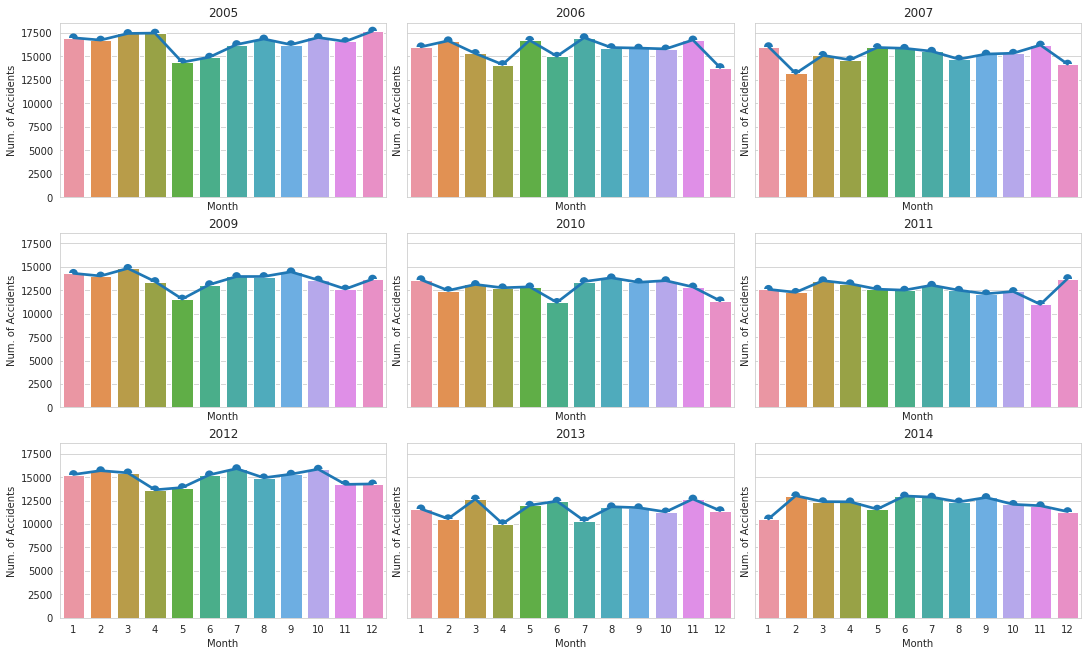

In [12]:
fig, axs = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, constrained_layout=True, figsize=(15,9))
year = 2004

for row in range(axs.shape[0]):
    for col in range(axs.shape[1]):
        year += 1
        if year == 2008: year = 2009
        sns.barplot(ax=axs[row][col],x=accidents_peryear[str(year)]["Month"].unique(),
                    y=accidents_peryear[str(year)].groupby("Month")["Year"].count())
        sns.pointplot(ax=axs[row][col],x=accidents_peryear[str(year)]["Month"].unique(),
                     y=accidents_peryear[str(year)].groupby("Month")["Year"].count())
        axs[row][col].set_ylabel("Num. of Accidents")
        axs[row][col].set_xlabel("Month")
        axs[row][col].set_title(str(year))
        
fig.show()

Here we can see again that there's just much more volume overall in 2012, not an eventual peak. Trends however, seem fairly similar.

**October** and **November** are consistently the months with most accidents

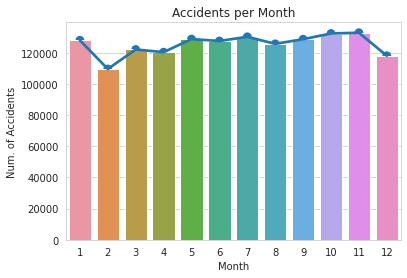


Mean:125319.92   Standard Deviation:6747.99



Month,1,2,3,4,5,6,7,8,9,10,11,12
Num. of Accidents,127974,109540,122059,120333,128738,127500,130196,125667,128656,132310,132815,118051


In [13]:
# Temporary df for viz
dfmonth = pd.DataFrame(accidents.groupby("Month")["Year"].count())
dfmonth = dfmonth.rename({"Year":"Num. of Accidents"}, axis=1)

sns.barplot(x = dfmonth.index, y = dfmonth["Num. of Accidents"])
sns.pointplot(x=dfmonth.index,y=dfmonth["Num. of Accidents"])
plt.title("Accidents per Month")
plt.show()

print("\nMean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(dfmonth.mean().unique()), float(dfmonth.std().unique())))
dfmonth.T

On **average** a month has *125,345.83* accidents, with a **Standard Deviation** of *8,280.73*.

### Accidents per hour of the day

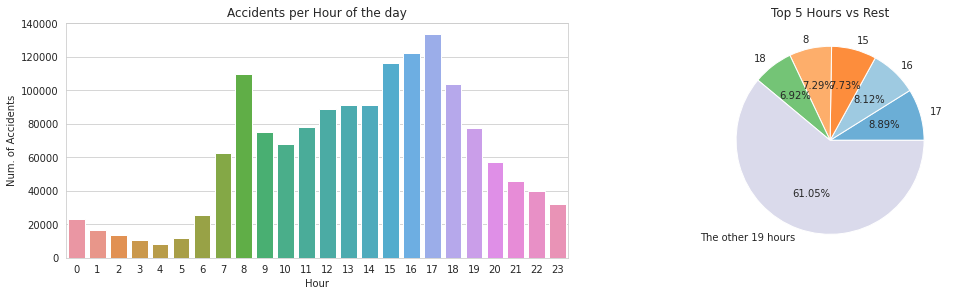


Mean:62659.96   Standard Deviation:39438.75

      Num. of Accidents
Hour                   
17               133728
16               122117
15               116250
8                109608
18               104067 



Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Num. of Accidents,23024,16886,13616,10826,8347,12032,25831,62368,109608,74893,...,91251,116250,122117,133728,104067,77717,57208,45746,39886,31875


In [14]:
df = pd.DataFrame(accidents.groupby("Hour")["Year"].count())
df = df.rename({"Year":"Num. of Accidents"}, axis=1)
top5hours = pd.DataFrame(df["Num. of Accidents"].nlargest(5))
elsehours = pd.DataFrame(data = {'Hour':'The other 19 hours',
                                 'Num. of Accidents':[df["Num. of Accidents"].nsmallest(19).sum()]})

elsehours.set_index("Hour", inplace=True)
topvsothers = pd.concat([top5hours, elsehours])


fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))

sns.barplot(ax=axs[0], x = df.index, y = df["Num. of Accidents"])
axs[0].set_title("Accidents per Hour of the day")

cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([1, 2, 5, 6, 9,15]))
axs[1].pie(topvsothers["Num. of Accidents"], labels=topvsothers.index, autopct='%1.2f%%',colors=colors)
axs[1].set_title("Top 5 Hours vs Rest")

plt.show()

print("\nMean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(df.mean().unique()), float(df.std().unique())))
print(top5hours, "\n")
df.T

This could very well be a bar plot showing most traffic hours. Most accidents occur during day time, when there's **more traffic**. If we have a deeper look, we can see that *Top 3* hours and *Top 5* are between hours **15:00 - 18:59**. *Top 4* being **8:00 - 8:59**. These *5 hours make up for almost 40%* of the accidents.

We also have a **mean** value of *62,659.96* accidents per hour, with a **Standard Deviation** of *39,438.75*. Obviously, a much more spread distribution than between different months.

### Quick sum up viz: *When do most car accidents occur?*

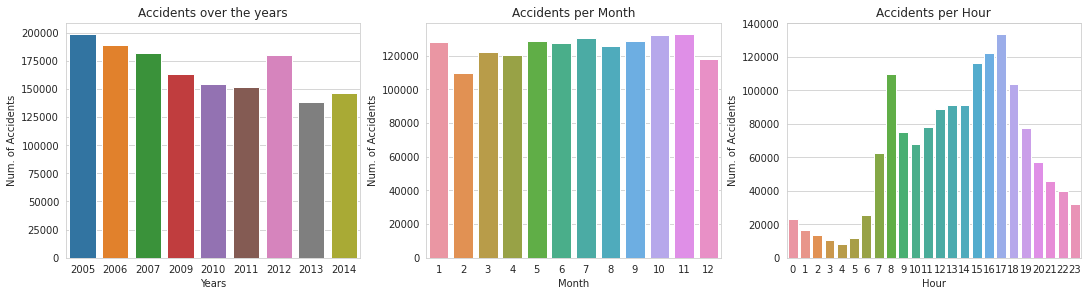


YEARLY - Mean:167093.22   Standard Deviation:21002.18

MONTHLY - Mean:125319.92   Standard Deviation:6747.99

HOURLY - Mean:62659.96   Standard Deviation:39438.75



In [15]:
fig, axs = plt.subplots(nrows=1, ncols=3, constrained_layout=True, figsize=(15,4))

sns.barplot(ax=axs[0], x=accidents.Year.value_counts().index,y=accidents.Year.value_counts())
axs[0].set_ylabel("Num. of Accidents")
axs[0].set_xlabel("Years")
axs[0].set_title("Accidents over the years")

sns.barplot(ax=axs[1], x = dfmonth.index, y = dfmonth["Num. of Accidents"])
axs[1].set_title("Accidents per Month")

sns.barplot(ax=axs[2], x = df.index, y = df["Num. of Accidents"])
axs[2].set_title("Accidents per Hour")

plt.show()

print("\nYEARLY - Mean:{:.2f}   Standard Deviation:{:.2f}".format(accidents.Year.value_counts().mean(), 
                                                                  accidents.Year.value_counts().std()))
print("\nMONTHLY - Mean:{:.2f}   Standard Deviation:{:.2f}".format(float(dfmonth.mean().unique()),
                                                                    float(dfmonth.std().unique())))
print("\nHOURLY - Mean:{:.2f}   Standard Deviation:{:.2f}\n".format(float(df.mean().unique()), float(df.std().unique())))

**Downwards trend over the years** (**2012** exception). Most accidents occurring in **November and October**, as well as **15:00 - 18:59** and **8:00 - 8:59**.

<a id="conditions"></a>
## Road conditions affecting accidents?
### Road type

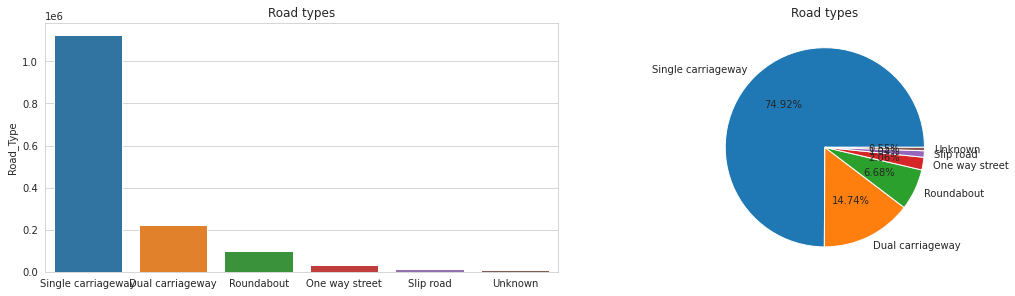

Single carriageway    1126701
Dual carriageway       221707
Roundabout             100449
One way street          30973
Slip road               15666
Unknown                  8343
Name: Road_Type, dtype: int64

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,4))
road = accidents["Road_Type"].value_counts()

sns.barplot(ax=axs[0], x = road.index, y = road)
axs[0].set_title("Road types")

axs[1].pie(road, labels=road.index, autopct='%1.2f%%')
axs[1].set_title("Road types")

plt.show()

road

**Single carriageway** is by far the road type with most accidents. I think **Roundabouts** should also be mentioned, I don't think there are that many of them, still many accidents seem to occur around them.

### Weather conditions

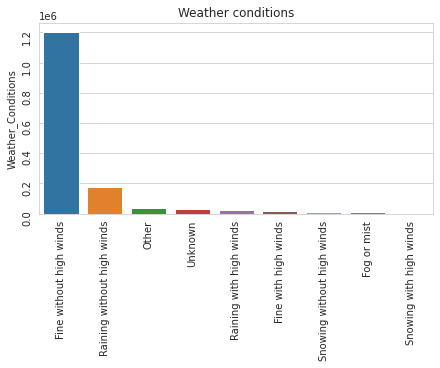

Fine without high winds       1203705
Raining without high winds     177626
Other                           33495
Unknown                         28280
Raining with high winds         20808
Fine with high winds            18352
Snowing without high winds      11299
Fog or mist                      8188
Snowing with high winds          1960
Name: Weather_Conditions, dtype: int64

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, constrained_layout=True, figsize=(6,5))
weather = accidents["Weather_Conditions"].value_counts()

sns.barplot(ax=axs, x = weather.index, y = weather)
axs.set_title("Weather conditions")
axs.tick_params(labelrotation=90)


plt.show()

weather

This doens't say much. We don't know exactly the times it was raining or there were high winds, so **we can't** really **tell if a given weather condition is affecting accidents** much or not.

### Light conditions

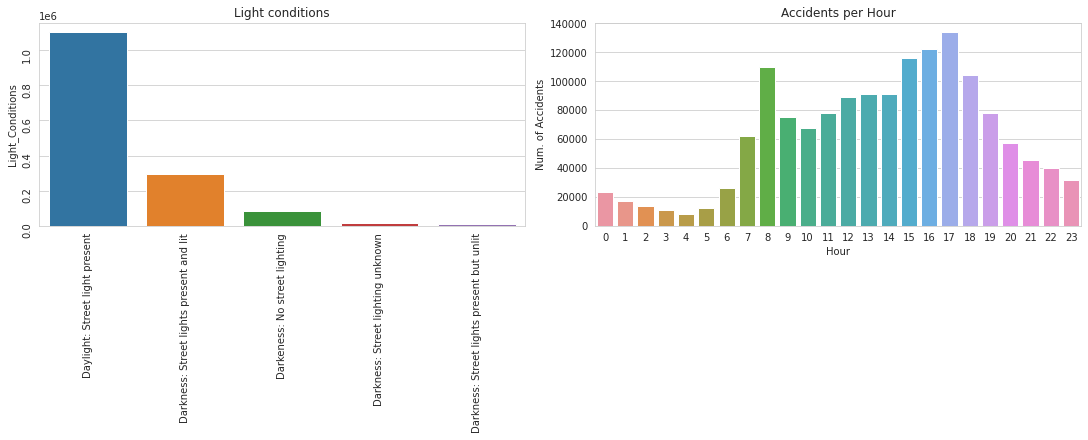

Daylight: Street light present               1102015
Darkness: Street lights present and lit       296274
Darkeness: No street lighting                  82537
Darkness: Street lighting unknown              16109
Darkness: Street lights present but unlit       6904
Name: Light_Conditions, dtype: int64

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))
light = accidents["Light_Conditions"].value_counts()

sns.barplot(ax=axs[0], x = light.index, y = light)
axs[0].set_title("Light conditions")
axs[0].tick_params(labelrotation=90)

sns.barplot(ax=axs[1], x = df.index, y = df["Num. of Accidents"])
axs[1].set_title("Accidents per Hour")

plt.show()

light

Here again, we can see that most accidents occur during daytime, with day light. However, we would need the total number of trips during each condition to look for a correlation with accidents.

### Speed limit

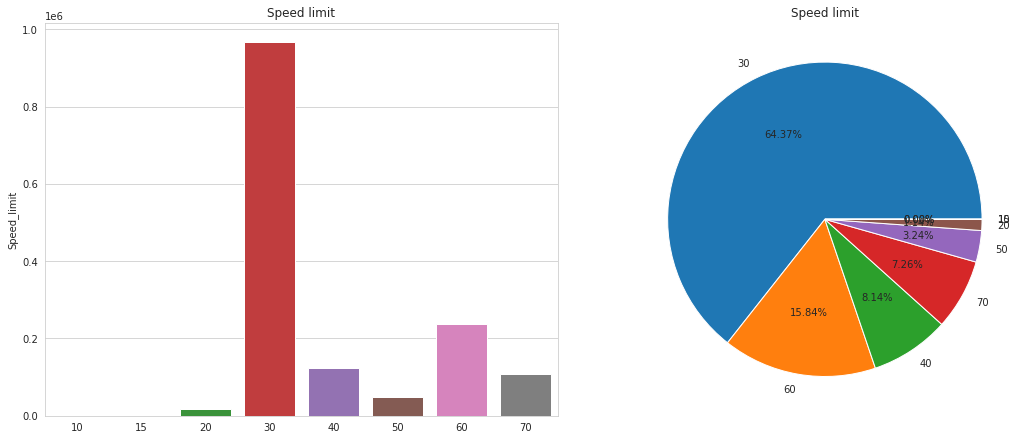

30    968094
60    238166
40    122376
70    109249
50     48778
20     17152
10        14
15        10
Name: Speed_limit, dtype: int64

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(15,6))
speed = accidents["Speed_limit"].value_counts()

sns.barplot(ax=axs[0], x = speed.index, y = speed)
axs[0].set_title("Speed limit")

axs[1].pie(speed, labels=speed.index, autopct='%1.2f%%')
axs[1].set_title("Speed limit")

plt.show()

speed

**30 miles per hour** road sections are were more accidents occur. Same thing mentioned before, we need more data to look for correlations.

**NOTE: 1mph = 1.60934 km/h**

### Quick sum up viz: *Road conditions: Affecting accidents?*

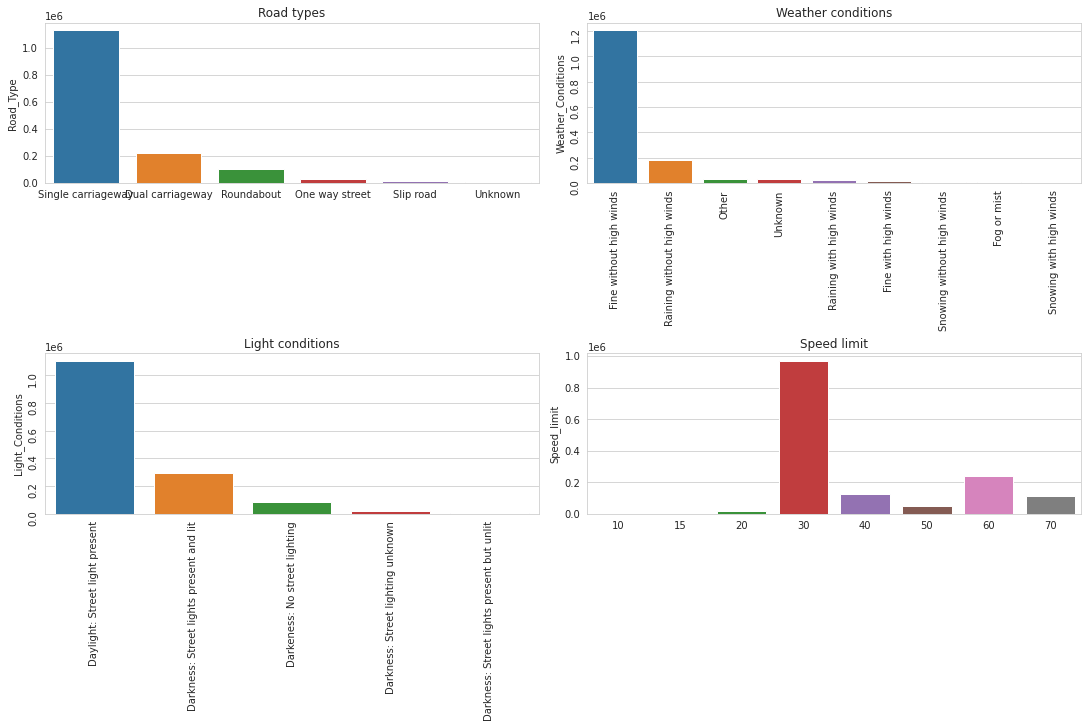

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(15,10))

sns.barplot(ax=axs[0,0], x = road.index, y = road)
axs[0,0].set_title("Road types")

sns.barplot(ax=axs[0,1], x = weather.index, y = weather)
axs[0,1].set_title("Weather conditions")
axs[0,1].tick_params(labelrotation=90)

sns.barplot(ax=axs[1,0], x = light.index, y = light)
axs[1,0].set_title("Light conditions")
axs[1,0].tick_params(labelrotation=90)

sns.barplot(ax=axs[1,1], x = speed.index, y = speed)
axs[1,1].set_title("Speed limit")

plt.show()

**Single carriageway** is by far the road type with most accidents. **Roundabouts** would be interesting to look at.

We mentioned how not knowing the amount of total trips isn't helping us looking for correlations between conditions and number of accidents. So not much we can say from these graphs.

## Results

### *What to do with all of this ?*

These were the questions we wanted to get insights about:
* Where do most car accidents occur
* When do most car accidents occur
    - Have car accidents distributions varied in any way over the years?
* Road conditions in accidents
    - Road type
    - Weather conditions
    - Light conditions
    - Speed limit
   
We looked at all of them, and some insights were more useful than others; many times due to the lack of more data.

However, I think we still got some cool graphs and information. To have a better look at all we got, I'm going to **SUM UP the SUM UPs** from each section !!

### *Where do most car accidents occur?*

Looks like most accidents happen, as could be expected; in big cities around **London**, **Liverpool** and the **Midlands**, and around *Newcastle* and *Middlesbrough* in the **North East**. Meanwhile in *Scotland* there's a big concentration as well, between **Glasgow** and **Edinburgh**. In *Wales*, most accidents occur near the capital, **Cardiff**. 

Comparing countries in the UK (or Great Britain, I don't think there's data from Nothern Ireland), most accidents seem to take place in **England**. We should also keep in mind there is where most trips happen. It's probably not that English drivers don't how to drive. It's more likely that there is a higher chance to suffer an accident when there's more traffic. This same logic can be applied throughout the whole analysis.

### *When do most car accidents occur?*

**Accident over the years:** Over the years trend is downwards, reason may be imporvement of road infrastructure, emergency care and peoples awareness, except in 2012 it increases rapidly.

**Accident over the months:** Over the months trend is uneven it decreases in december and february and it is highest in october and november, reason may be .

**Accident over the days:** Over the years trend is downwards, reason may be imporvement of road infrastructure, emergency care and peoples awareness, except in 2012 it increases rapidly.

**Accident over the hours:** Over the years trend is downwards, reason may be imporvement of road infrastructure, emergency care and peoples awareness, except in 2012 it increases rapidly.

### *Road conditions: Affecting accidents?*

**Single carriageway** is by far the road type with most accidents. **Roundabouts** would be interesting to look at.

We mentioned how not knowing the amount of total trips isn't helping us looking for correlations between conditions and number of accidents. So not much we can say from these graphs.

*If anyone wants to look at the graphs in each section, I've provided hyperlinks to access them rapidly.*